# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

In [158]:
import pandas as pd
file_path = './sample_NYC_parking_issues.csv'
data = pd.read_csv(file_path, sep=';', encoding='utf-8') #UFT= Unicode TRansformation Format 8 bytes, sirve para interpretar los carácteres cuando se carga el archivo y permite leer tildes y ñ.


### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [159]:
data = data.dropna(axis=1, how='all')
print(f"Dimensiones del DataFrame después de limpiar: {data.shape}")


Dimensiones del DataFrame después de limpiar: (10000, 41)


### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [160]:
#data = data.loc[:, ~data.columns.duplicated()]
#data.columns = data.columns.str.strip() #Eliminamos los espacios entre columnas

data['Vehicle Year'] = pd.to_numeric(data['Vehicle Year'], errors='coerce') #Todos los valores que NO sean numéricos los convierte en "Nan"
data = data.dropna(subset=['Vehicle Year']) #Todos los valores que sean Nan son eliminados
data['Vehicle Year'] = data['Vehicle Year'].astype(int) #convertimos los que son numeros, a integer(numeros enteros)



### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [161]:
#Vuelvo a poner todo esto porque sino me sale que las muestras eliminadas son 0 
import pandas as pd
file_path = './sample_NYC_parking_issues.csv'
data = pd.read_csv(file_path, sep=';')

###################################################################################################
#Primero contamos cuantas filas hay
filas_iniciales = data.shape[0]

#Eliminamos vacias y espacios en blanco 
data = data[data['Vehicle Make'].notna()] 
data = data[data['Vehicle Make'] != '']

# Primero nos aseguramos de que no haya espacios y que todas las marcas esten en mayusculas
data['Vehicle Make'] = data['Vehicle Make'].str.upper().str.strip()

# Luego, he verificado todas las marcas una por una y las marcas aproximadas las convertimos en las marcas bien escritas.
#Para hacer esto lo que he hecho es cojer el csv, he hecho una pivot table solo con los nombres de las marcas, y le he pedido a la IA que me asocie estos nombres con nombres de marcas de coches y si no existen que me diga cuales no existen
#creamos un diccionario con las marcas bien y las reemplazamos
correcciones = {
    'ACURA': 'ACURA',
    'AMC': 'AMC',
    'AUDI': 'AUDI',
    'BENTIL': 'BENTLEY',
    'BENTL': 'BENTLEY',  # CORREGIDO
    'BL/B': 'BLUE BIRD',
    'BMW': 'BMW',
    'BUICK': 'BUICK',
    'CADIL': 'CADILLAC',
    'CHEVR': 'CHEVROLET',
    'CHRYS': 'CHRYSLER',
    'CHEET': 'CHEETAH',  # CORREGIDO
    'DATSU': 'DATSUN',
    'DODGE': 'DODGE',
    'FERRA': 'FERRARI',
    'FIAT;': 'FIAT',
    'FORD': 'FORD',
    'FRGHT': 'FREIGHTLINER',
    'FRUEH': 'FRUEHAUF',
    'FREI': 'FREIGHTLINER',  # CORREGIDO
    'GMC': 'GMC',
    'HARLE': 'HARLEY DAVIDSON',
    'HUMME': 'HUMMER',
    'HYUND': 'HYUNDAI',
    'INFIN': 'INFINITI',
    'ISUZU': 'ISUZU',
    'JAGUA': 'JAGUAR',
    'JEEP': 'JEEP',
    'KAWAS': 'KAWASAKI',
    'KENW': 'KENWORTH',
    'KENWO': 'KENWORTH',  # CORREGIDO
    'LEXCO': 'LEXUS',
    'MACK': 'MACK',
    'MAZDA': 'MAZDA',
    'ME/BE': 'MERCEDES-BENZ',
    'MERCU': 'MERCURY',
    'MINI': 'MINI',
    'MITSU': 'MITSUBISHI',
    'NISSA': 'NISSAN',
    'OLDSM': 'OLDSMOBILE',
    'PLYMO': 'PLYMOUTH',
    'PORSC': 'PORSCHE',
    'ROVER': 'LAND ROVER',
    'RNG R': 'RANGE ROVER',
    'SAAB': 'SAAB',
    'SATUR': 'SATURN',
    'SCION': 'SCION',
    'SMART': 'SMART',
    'SUBAR': 'SUBARU',
    'SUZUK': 'SUZUKI',
    'TOYOT': 'TOYOTA',
    'VOLKS': 'VOLKSWAGEN',
    'VOK': 'VOLKSWAGEN',  # CORREGIDO
    'VOLVO': 'VOLVO',
    'YAMAH': 'YAMAHA',
    'TRIUM': 'TRIUMPH',
    'VESPA': 'VESPA',
    'PONTI': 'PONTIAC',
    'KIA': 'KIA',
    'FIAT': 'FIAT',
    'LEXUS': 'LEXUS',
    'INTER': 'INTERNATIONAL',
    'FUSO': 'MITSUBISHI FUSO',
    'UD': 'UD TRUCKS',
    'STERL': 'STERLING',
    'STUDE': 'STUDEBAKER',
    'FRG': 'FREIGHTLINER',
    'TRLR': 'TRAILER',
    'PREVO': 'PREVOST',
    'MCI': 'MCI',
    'TEAMA': 'TEAM ALFA',
    'BLUE': 'BLUE BIRD',
    'GREAT': 'GREAT DANE',
    'FRUEH': 'FRUEHAUF',
    'GEM': 'GEM',  # CORREGIDO
    'LINCO': 'LINCOLN',  # CORREGIDO
    'STAR': 'POLESTAR',  # CORREGIDO
    'VAN': 'VOLKSWAGEN'  # CORREGIDO
}

data['Vehicle Make'] = data['Vehicle Make'].replace(correcciones)

marcas_innexistentes = [
    'N/S',  # Sin información
    'NS/OT',  # No especificado / Otro
    'KRYS',  # No corresponde a ninguna marca conocida
    'WO/C',  # No tiene sentido como marca
    'WORK',  # No es una marca válida
    'WORKH',  # No es una marca válida
    'GIDNY',  # No corresponde a ninguna marca conocida
    'FONTA',  # No es una marca válida
    'PRATT',  # No corresponde a ninguna marca conocida
    'FRIG',  # Posible error de escritura
    'UNKNOWN',  # Sin información
    'CHECK',  # No tiene sentido como marca
    'EAST',  # No parece corresponder a ninguna marca
    'ICENE',  # No corresponde a ninguna marca conocida
    'SOLEC',  # No tiene sentido como marca
    'SPRI',  # No tiene sentido como marca
    'SMITH',  # No corresponde a ninguna marca conocida
    'HERCU',  # No corresponde a ninguna marca conocida
    'WANC',  # No tiene sentido como marca
    'VL',  # Ambiguo y sin correspondencia conocida
    'UTIL',  # No corresponde a ninguna marca conocida
    'UTILI',  # No corresponde a ninguna marca conocida
    'UTITY',  # No corresponde a ninguna marca conocida
    'THD',  # Ambiguo y sin correspondencia conocida
    'PETER',  # Sin sentido como marca conocida
    'PUTEL',  # Sin correspondencia conocida
    'TRAIL',  # No corresponde a ninguna marca conocida
    'NAVIS',  # Sin correspondencia conocida
    'MI/F',  # Sin correspondencia conocida
    'LIMO',  # No corresponde a ninguna marca conocida
]

data = data[data['Vehicle Make'].isin(marcas_innexistentes) == False]
filas_finales = data.shape[0]

#calculamos cuantas filas hemos suprimido
filas_suprimidas = filas_iniciales - filas_finales

print(f"El numero de filas suprimidas son:", {filas_suprimidas})
print(f"Ahora el DataFrame tiene una dimensión de (filas, columnas): {data.shape}")


El numero de filas suprimidas son: {336}
Ahora el DataFrame tiene una dimensión de (filas, columnas): (9664, 44)


### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

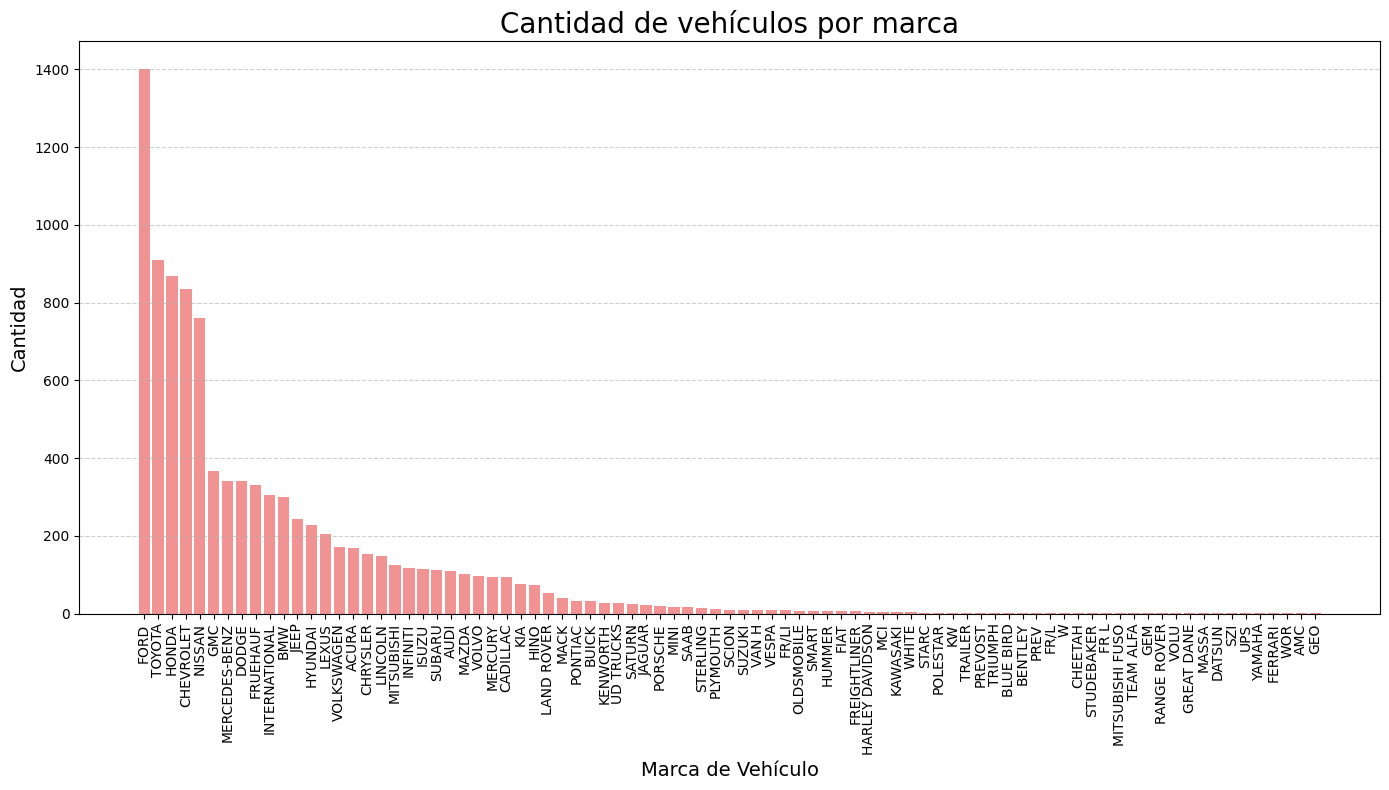

In [ ]:

import pandas as pd
import matplotlib.pyplot as mpl

conteo_marcas = data['Vehicle Make'].value_counts()

#Paso por paso cómo crear un grafico 
mpl.figure(figsize=(14, 8))  # Como hemos guardado muchas etiquetas, debemos hacerlo bastante amplio
#Podriamos optar por eliminar la cola del grafico, pero esto lo hago ya en el otro grafico del apartado I
mpl.bar(conteo_marcas.index, conteo_marcas.values, color='lightcoral', alpha=0.85)  # el alpha es para poner la transparencia 

# TITULO Y ETIQUETAS
mpl.title('Cantidad de vehículos por marca', fontsize=20)  #Grande, ir probando
mpl.xlabel('Marca de Vehículo', fontsize=14)  #Titulo eje x
mpl.ylabel('Cantidad', fontsize=14)  # titulo eje y

# Ajustar las etiquetas del eje X para que no queden pegadas
mpl.xticks(
    rotation=90,  # Esto sirve para rotar las etiquetas de las marcas y que lo podamos leer. 
    ha='center',  # Esto sirve para centrar las etiquetas y que queden debajo de las barras
    fontsize=10  # Ponemos las etiquetas pequeñas para que no queden unas encima de las otras
)

mpl.grid(axis='y', linestyle='--', alpha=0.6)  #Esto son las rayitas del fono para que sea mas legible.
mpl.tight_layout()  # Para que todo el grafico se vea dentro de la imagen

# Mostrar el gráfico
mpl.show()

### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [175]:
# Siempre importo pandas
import pandas as pd

# Creamos un diccionario con los colores que vamos a remplazar 
colores_reemplazo = {
    # WHITE
    'W': 'WHITE', 'WH': 'WHITE', 'WH/': 'WHITE', 'WH-BL': 'WHITE', 'WHI': 'WHITE', 
    'WHIT': 'WHITE', 'WHITE': 'WHITE', 'WHR': 'WHITE', 'WHT': 'WHITE', 'WT': 'WHITE', 'WTH': 'WHITE', 'WGUTE': 'WHITE',
    
    # BLACK
    'BK': 'BLACK', 'BKACK': 'BLACK', 'BKBR': 'BLACK', 'BKJ': 'BLACK', 'BK-RD': 'BLACK', 
    'BL': 'BLACK', 'BLACK': 'BLACK', 'BLG': 'BLACK', 'BLGY': 'BLACK', 'BLK': 'BLACK', 'BLK/B': 'BLACK',
    
    # BLUE
    'BLU': 'BLUE', 'BLUE': 'BLUE', 'DKB': 'BLUE', 'DKBL': 'BLUE', 'LTB': 'BLUE', 'LTBL': 'BLUE',
    
    # BEIGE
    'B': 'BEIGE', 'BEIGE': 'BEIGE', 'BG': 'BEIGE',
    
    # BROWN
    'BN': 'BROWN', 'BR': 'BROWN', 'BRN': 'BROWN', 'BROW': 'BROWN', 'BROWN': 'BROWN', 
    'BRW': 'BROWN', 
    
    # BURGUNDY
    'BURG': 'BURGUNDY',
    
    # GRAY
    'GR': 'GRAY', 'GRAY': 'GRAY', 'GREY': 'GRAY', 'GRG': 'GRAY', 'GRN': 'GRAY', 'GREN': 'GRAY', 
    'GRT': 'GRAY', 'GRY': 'GRAY', 'GY': 'GRAY', 'GY/': 'GRAY', 'GYBR': 'GRAY', 'GYGY': 'GRAY', 
    'GY-GY': 'GRAY', 'GYT': 'GRAY', 'GYTN': 'GRAY', 'GYW': 'GRAY', 'DKGY': 'GRAY', 'LTG': 'GRAY', 'LTGY': 'GRAY',
    
    # GREEN
    'GN': 'GREEN', 'GREEN': 'GREEN', 'GREN': 'GREEN',
    
    # GOLD
    'GD': 'GOLD', 'GL': 'GOLD', 'GLD': 'GOLD',
    
    # RED
    'R': 'RED', 'RB': 'RED', 'RD': 'RED', 'RD/': 'RED', 'RED': 'RED', 'MAROO': 'RED', 'MR': 'RED',
    
    # PURPLE
    'PR': 'PURPLE', 'PUR': 'PURPLE', 'PURPL': 'PURPLE',
    
    # ORANGE
    'OR': 'ORANGE', 'ORANG': 'ORANGE',
    
    # YELLOW
    'YEL': 'YELLOW', 'YELLO': 'YELLOW', 'YELOW': 'YELLOW', 'YL': 'YELLOW', 'YW': 'YELLOW',
    
    # SILVER
    'SIL': 'SILVER', 'SILV': 'SILVER', 'SILVE': 'SILVER', 'SILVR': 'SILVER', 'SL': 'SILVER', 
    'SLV': 'SILVER', 'SLVR': 'SILVER',
    
    # TAN
    'TAN': 'TAN', 'TEN': 'TAN', 'TN': 'TAN', 'TNGR': 'TAN',
    
    # UNKNOWN
    'UNKNO': 'UNKNOWN', 'NOC': 'UNKNOWN', 'NOCL': 'UNKNOWN', 'OTHER': 'UNKNOWN',
}

# Lista de colores válidos (sin los "UNKNOWN")
colores_validos = list(set(colores_reemplazo.values()) - {'UNKNOWN'})

data = data[data['Vehicle Color'].notna()]  # Suprimimos las celdas nulas
data['Vehicle Color'] = data['Vehicle Color'].str.upper().str.strip()  # Convertimos a mayúsculas y eliminar espacios
data['Vehicle Color'] = data['Vehicle Color'].replace(colores_reemplazo)  # reemplazamos los colores según el diccionario

# Filtramos para que solo me queden los valores válidos
data = data[data['Vehicle Color'].isin(colores_validos)]

#Verificamos las primeras filas después de haber sustituido 
print("Primeras filas después del procesamiento:")
print(data[['Vehicle Color']].head())
#verificamos la lista de colores unicos de colores
print("Colores únicos en el DataFrame:")
print(data['Vehicle Color'].unique())


Primeras filas después del procesamiento:
  Vehicle Color
1         BLACK
3          GRAY
4           RED
5          GRAY
6          GRAY
Colores únicos en el DataFrame:
['BLACK' 'GRAY' 'RED' 'WHITE' 'GOLD' 'BROWN' 'TAN' 'BLUE' 'YELLOW'
 'SILVER' 'ORANGE' 'PURPLE' 'GREEN' 'BEIGE' 'BURGUNDY']


### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

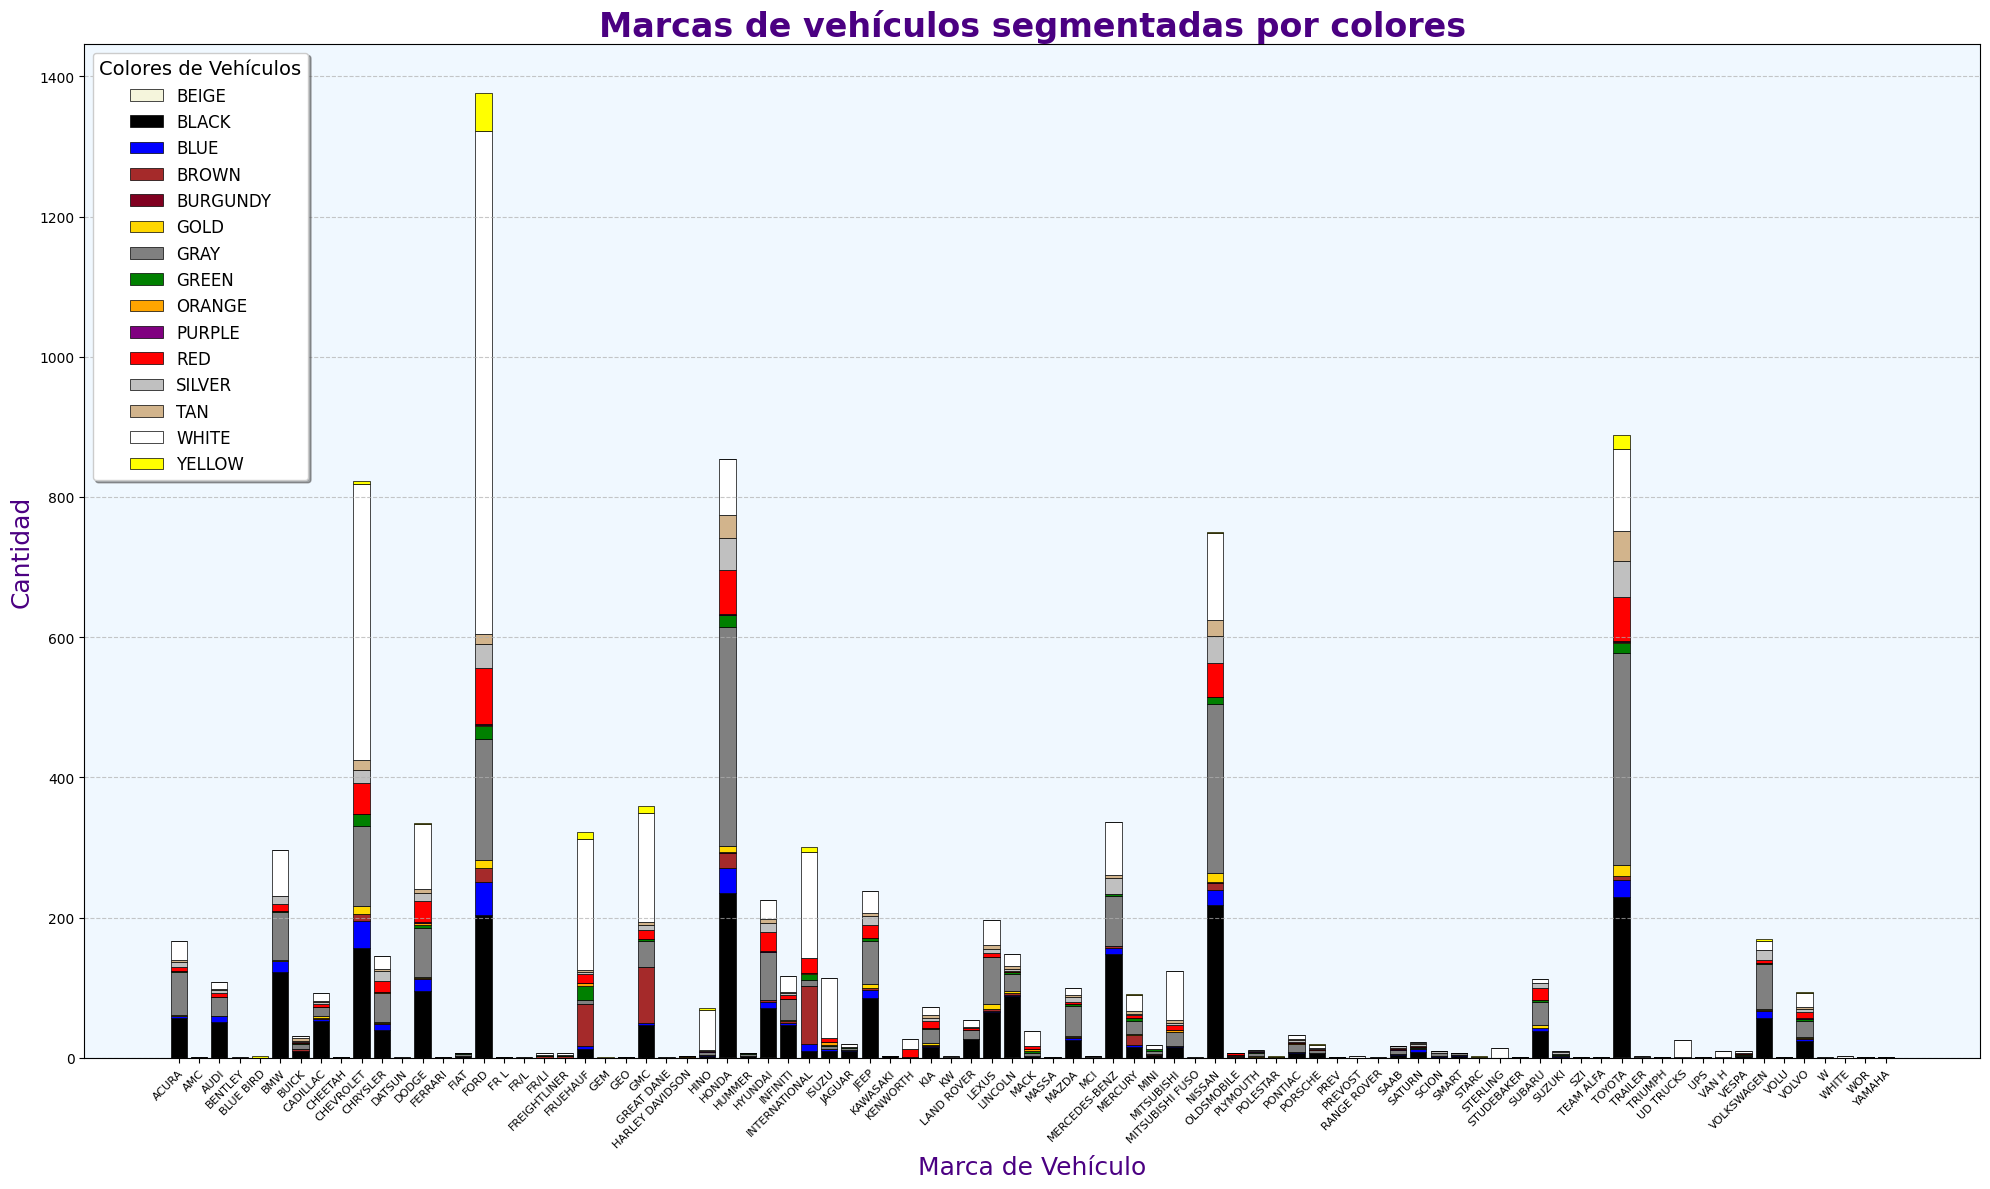

In [ ]:
import matplotlib.pyplot as plt

# Crear la tabla de frecuencias cruzadas
frecuencias = pd.crosstab(data['Vehicle Make'], data['Vehicle Color'])

# Diccionario de colores coherentes
#He puesto cada color con el que le pertenezca para que se vea mas claro y bonito 

colores_visuales = {
    'WHITE': '#FFFFFF',
    'BLACK': '#000000',
    'BLUE': '#0000FF',
    'RED': '#FF0000',
    'GRAY': '#808080',
    'GREEN': '#008000',
    'BROWN': '#A52A2A',
    'BURGUNDY': '#800020',
    'GOLD': '#FFD700',
    'YELLOW': '#FFFF00',
    'SILVER': '#C0C0C0',
    'ORANGE': '#FFA500',
    'PURPLE': '#800080',
    'BEIGE': '#F5F5DC',
    'TAN': '#D2B48C',
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 12))  #Aumentamos el tamaño del grafo

# Base inicial para aplicar las barras
base = [0] * len(frecuencias.index)

# Crear barras apiladas con contornos y colores definidos
for color in frecuencias.columns:
    ax.bar(
        frecuencias.index,
        frecuencias[color],
        bottom=base,
        label=color,
        color=colores_visuales.get(color, '#D3D3D3'),  # Color del diccionario o gris claro si no está definido
        edgecolor='black',  # Contorno negro para visibilidad
        linewidth=0.5  # Grosor del contorno
    )
    base = base + frecuencias[color]  # Actualizar la base


ax.set_facecolor('#F0F8FF')  # Fondo azul claro para resaltar colores claros

#configuramos las etiquetas
ax.set_title('Marcas de vehículos segmentadas por colores', fontsize=24, fontweight='bold', color='#4B0082')
ax.set_xlabel('Marca de Vehículo', fontsize=18, color='#4B0082')
ax.set_ylabel('Cantidad', fontsize=18, color='#4B0082')

#configuramos el eje de las x
ax.set_xticks(range(len(frecuencias.index)))
ax.set_xticklabels(
    frecuencias.index, rotation=45, ha='right', fontsize=8, rotation_mode='anchor'
)  # Etiquetas pequeñas y rotadas

#configuramos la leyenda
ax.legend(
    title='Colores de Vehículos', fontsize=12, title_fontsize=14, loc='upper left', frameon=True, shadow=True
)

#La regilla dertas
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustamos el  diseño para que no quede apelotonado
fig.tight_layout()

# Mostramos el gráfico
plt.show()


### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

Ya lo he hecho

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [ ]:

print("Primeras filas del DataFrame original:")
print(data.head())

# Verificar valores únicos de Issue Date antes de convertir
print("Valores únicos en Issue Date antes de convertir:")
print(data['Issue Date'].unique())

# Convertir Issue Date a formato datetime
data['Issue Date'] = pd.to_datetime(data['Issue Date'], errors='coerce')
print(f"Valores nulos en 'Issue Date' después de la conversión: {data['Issue Date'].isna().sum()}")

# Filtrar valores nulos en Issue Date
data = data[data['Issue Date'].notna()]
print("Primeras filas de Issue Date después de filtrar:")
print(data['Issue Date'].head())
print(f"Tamaño del DataFrame después de filtrar fechas: {data.shape}")

# Verificar valores únicos en Violation Code
print("Valores únicos en Violation Code:")
print(data['Violation Code'].unique())

# Filtrar valores nulos en Violation Code
data = data[data['Violation Code'].notna()]
print(f"Tamaño del DataFrame después de filtrar Violation Code: {data.shape}")

# Crear la columna Month
data['Month'] = data['Issue Date'].dt.to_period('M')
print("Primeras filas después de agregar Month:")
print(data[['Issue Date', 'Month']].head())

# Agrupar por Violation Code y Month
resultado = data.groupby(['Violation Code', 'Month']).size().reset_index(name='Count')
print("Resultado final:")
print(resultado)


Primeras filas del DataFrame original:
   Unnamed: 0  Summons Number  Plate ID Registration State Plate Type  \
1     1399831      5070680213  9TOPCLAS                 NY        OMT   
3     6338606      7713806271   EDU1026                 NY        PAS   
4     2823881      7645478044   DXX6460                 NY        PAS   
5     4676439      1362296983   EVN1615                 NY        PAS   
6     3442581      7808737987   EMP3205                 NY        PAS   

   Issue Date  Violation Code Vehicle Body Type Vehicle Make Issuing Agency  \
1  09/14/2013               7              4DSD        DODGE              V   
3  03/20/2014              21              SUBN       TOYOTA              T   
4  11/01/2013              20              4DSD        HONDA              T   
5  12/04/2013              40               SDN       TOYOTA              P   
6  11/22/2013              21              4DSD   VOLKSWAGEN              T   

   ...  Vehicle Color  Unregistered Vehicle?  V

### J) Visualiza la anterior cuestión (I)

C:\Users\ainac\AppData\Local\Temp\ipykernel_16580\2137184135.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado_top_15['Month'] = resultado_top_15['Month'].dt.to_timestamp()


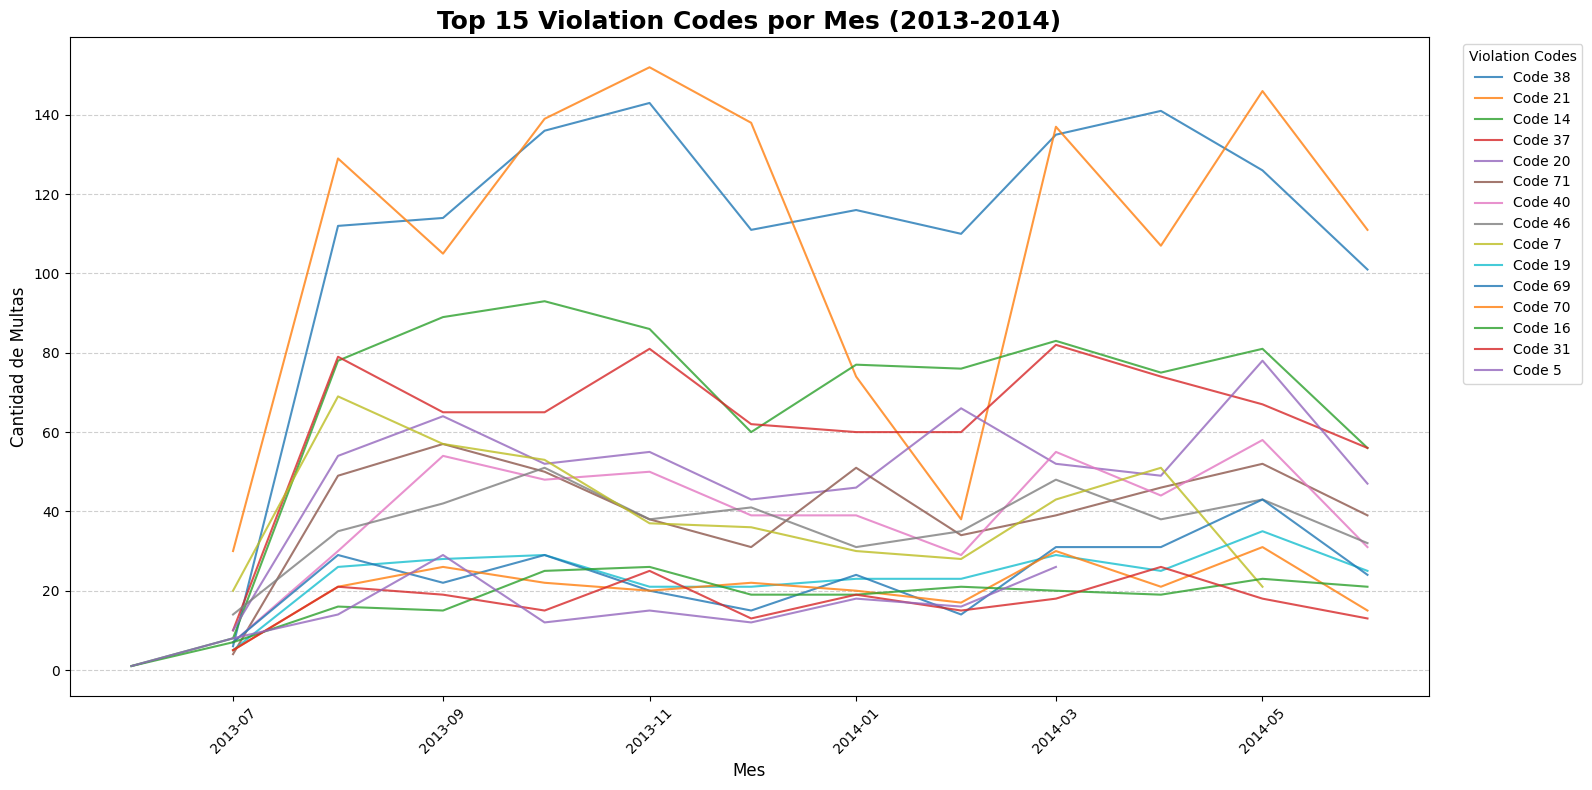

In [172]:
import matplotlib.pyplot as mpl

# Filtrar datos entre 2013 y 2014
resultado_filtrado = resultado[(resultado['Month'] >= '2013-06') & (resultado['Month'] <= '2014-12')]

# Identificar los 15 códigos de violación más comunes dentro del rango de fechas
top_15_violation_codes = resultado_filtrado.groupby('Violation Code')['Count'].sum().nlargest(15).index
resultado_top_15 = resultado_filtrado[resultado_filtrado['Violation Code'].isin(top_15_violation_codes)]

# Convertir Month a tipo datetime para usar en el gráfico
resultado_top_15['Month'] = resultado_top_15['Month'].dt.to_timestamp()

# Configurar el gráfico
mpl.figure(figsize=(16, 8))  # Ajustar tamaño del gráfico

# Dibujar una línea para cada uno de los 15 códigos seleccionados
for code in top_15_violation_codes:
    subset = resultado_top_15[resultado_top_15['Violation Code'] == code]
    mpl.plot(subset['Month'], subset['Count'], label=f'Code {code}', alpha=0.8)

# Mejorar el diseño del gráfico
mpl.title('Top 15 Violation Codes por Mes (2013-2014)', fontsize=18, weight='bold')
mpl.xlabel('Mes', fontsize=12)
mpl.ylabel('Cantidad de Multas', fontsize=12)

# Ajustar las etiquetas del eje X
mpl.xticks(rotation=45, fontsize=10)

# Ajustar la leyenda
mpl.legend(title='Violation Codes', fontsize=10, loc='upper left', bbox_to_anchor=(1.02, 1))

# Agregar grilla para facilitar la lectura
mpl.grid(axis='y', linestyle='--', alpha=0.6)

# Asegurar que todo el gráfico esté dentro del área visible
mpl.tight_layout()

# Mostrar el gráfico
mpl.show()


### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'

THE END 